In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.cluster import KMeans

In [4]:
#import the data
#This dataset was sourced from the UCI Machine Learning Repository.

data=pd.read_csv("https://assets.datacamp.com/production/course_2072/datasets/fish.csv",header=None)

In [5]:
features=data.iloc[:,1:]
labels=data.iloc[:,0]

In [7]:
features.shape , labels.shape

((85, 6), (85,))

## How many clusters of grains

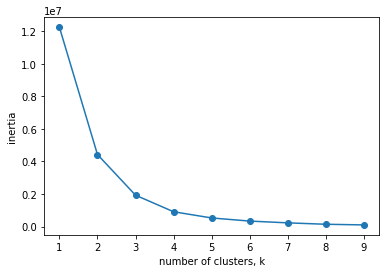

In [9]:
ks = range(1, 10)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model=KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(features)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


According to the elbow criteria, it is 4 clusters. Thus, coinciding with our lables. 

bream,roach,pike,smelt

## Evaluating the grain clustering

In [12]:


# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=4)

# Use fit_predict to fit model and obtain cluster labels: labels
predicted_labels = model.fit_predict(features)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'predicted_labels': predicted_labels, 'labels': labels})

# Create crosstab: ct
pd.crosstab(df['predicted_labels'],df['labels'])

labels,Bream,Pike,Roach,Smelt
predicted_labels,,,,
0,17,10,3,0
1,0,4,0,0
2,1,1,17,14
3,16,2,0,0


Our Model has performed very poorly. this is due the fact that variance in our features is very high.

In [23]:
data.var(axis=0)

1    145110.683403
2       127.451689
3       148.475328
4       174.168524
5       107.154440
6         4.483703
dtype: float64

To account for the high variance , we have to scale our features.

In [26]:
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=4)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,kmeans)


In [27]:
# Fit the pipeline to samples
pipeline.fit(features)


# Use fit_predict to fit model and obtain cluster labels: labels
predicted_labels = pipeline.predict(features)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'predicted_labels': predicted_labels, 'labels': labels})

# Create crosstab: ct
pd.crosstab(df['predicted_labels'],df['labels'])

labels,Bream,Pike,Roach,Smelt
predicted_labels,,,,
0,0,17,0,0
1,33,0,1,0
2,1,0,19,1
3,0,0,0,13


The Scaling has done its job. Now the predictions of model is accurate than before

## Visualization of the Grain clusters

In [34]:
# Import normalize
from sklearn.preprocessing import normalize

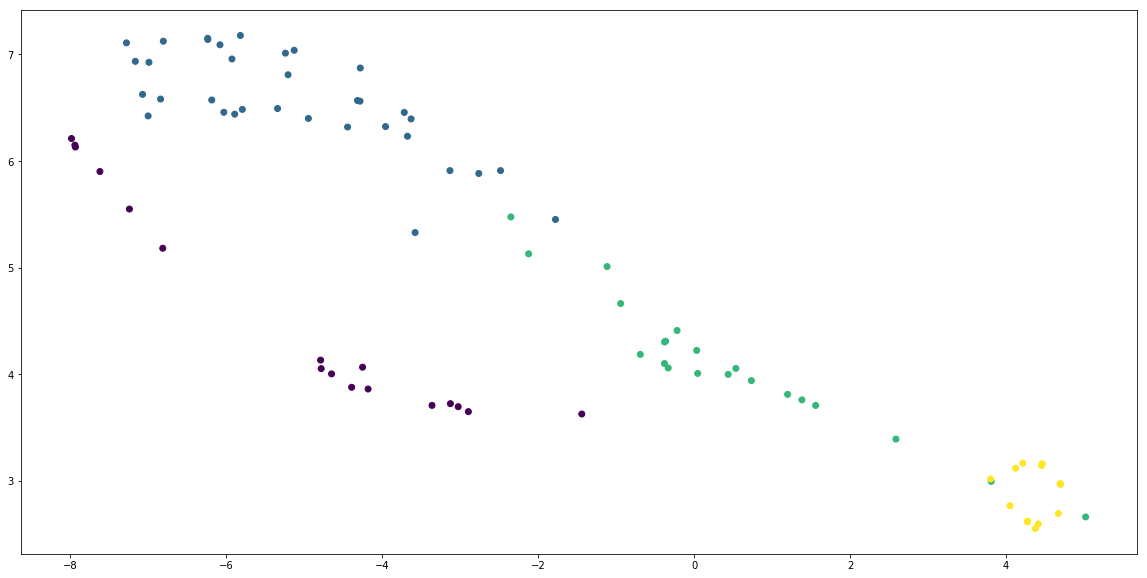

In [36]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model_tsne = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model_tsne.fit_transform(normalize(features))

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.figure(figsize=(20,10))
plt.scatter(xs,ys,c=predicted_labels)


plt.show()
